In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/us-accidents/US_Accidents_Dec19.csv


In [2]:
#Displaying the first five lines of  the dataset
df.head()

NameError: name 'df' is not defined

In [3]:
df=pd.read_csv('../input/us-accidents/US_Accidents_Dec19.csv')

**Finding the summary of the data like number of rows and columns etc**

In [4]:
print('Rows',df.shape[0])
print('Number of columns',df.shape[1])
print('Features or Column names',df.columns.tolist())
print('\n Missing values :',df.isnull().values.sum())
print('\n Unique values : \n',df.nunique())

Rows 2974335
Number of columns 49
Features or Column names ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

 Missing values : 11817022

 Unique values : 
 ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat           

**Finding out the columns with categorical values  using df.select_dtypes() method **

In [5]:
df.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [6]:
df['Description'].head()

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

**Displaying the catogerical values**

In [7]:
print(df['Source'].unique())
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())
print(df['No_Exit'].unique())

['MapQuest' 'MapQuest-Bing' 'Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]
[False  True]


**Finding the correlations in the data**

In [8]:
#first lets print some columns
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

**Drawing the heat maps** using .gcf() method 

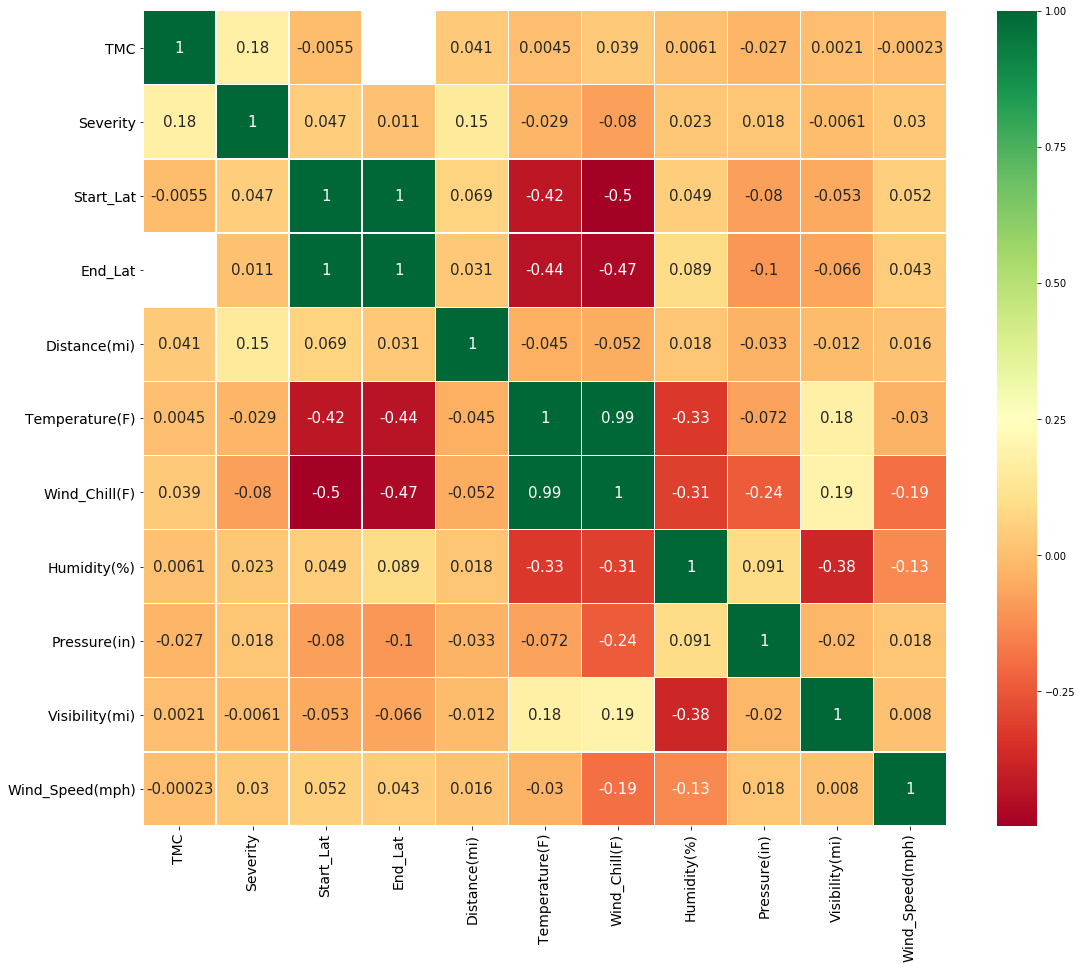

In [10]:
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)'
                   ,'Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)'
                   ,'Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2 ,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Finding the sources of the data**

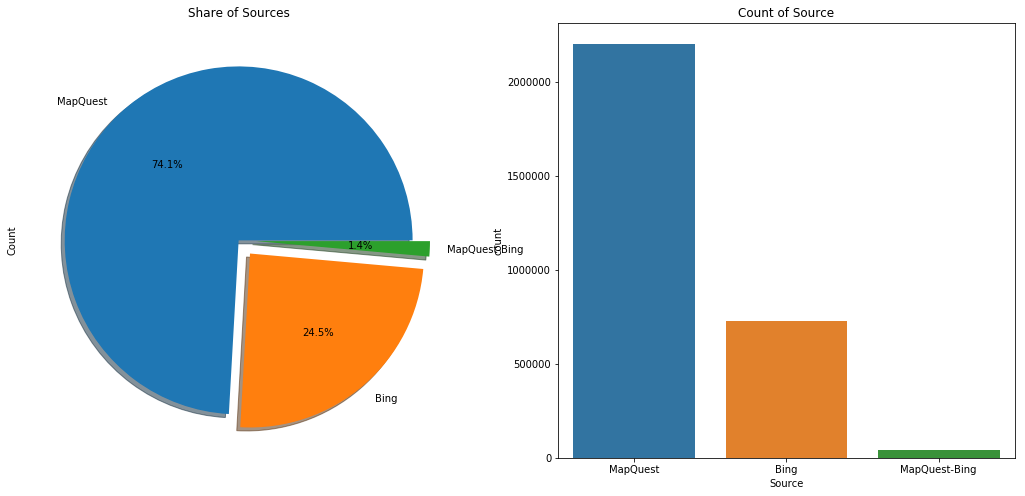

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

** Severity of the accidents**

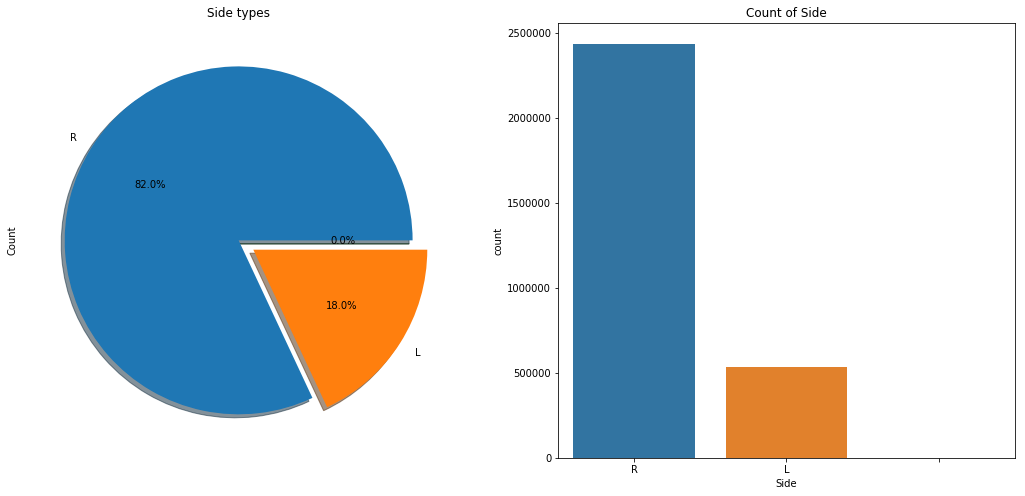

In [12]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

*As you can see most accidents occur on the right side i.e. drivers side*

** Side **
There are three things mentioned regarding the side R, L and third one is Blank No idea for that.

In [13]:
df['Side'].unique()

array(['R', 'L', ' '], dtype=object)

**Time Zone**

**Accidents in different timezones**

In [14]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

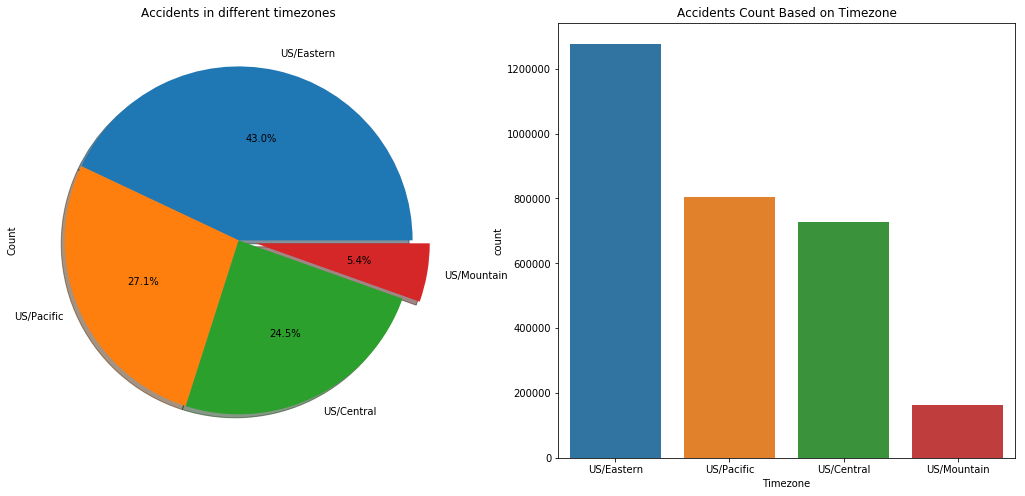

In [15]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in different timezones')
ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accidents Count Based on Timezone')
plt.show()

**Time taken to clear the traffice**

In [16]:
st = pd.to_datetime(df.Start_Time, format = '%Y-%m-%d %H:%M:%S')
end= pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 86.6% of the data


Text(0, 0.5, 'Fraction')

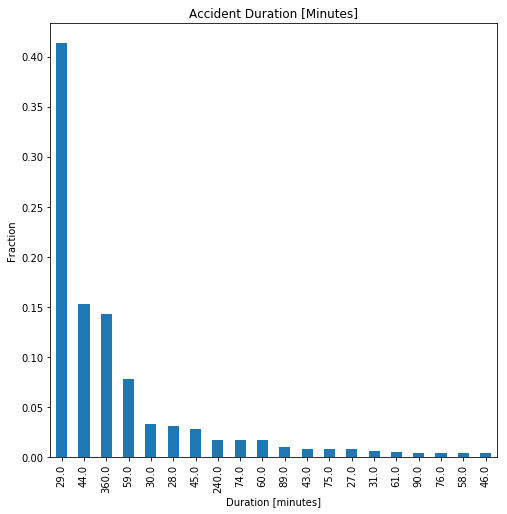

In [17]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction')

**Accident in different states**

Text(0, 0.5, '')

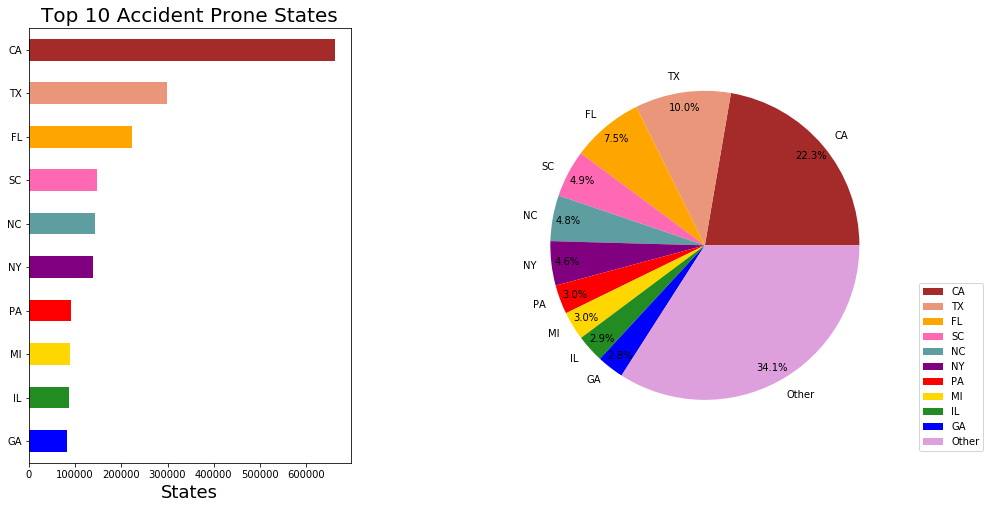

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
clr = ('blue','forestgreen','gold','red','purple','cadetblue','hotpink','orange','darksalmon','brown')
df['State'].value_counts()[0:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title('Top 10 Accident Prone States',size=20)
ax[0].set_xlabel('States', size=18)

count = df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))

groups.append('Other')
type_dict=pd.DataFrame({'group':groups , 'counts':counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx=type_dict.plot(kind='pie',y='counts',labels=groups,colors=clr1,autopct='%1.1f%%'
                 , pctdistance=0.9,radius=1.2,ax=ax[1])
plt.legend(loc=0 , bbox_to_anchor=(1.15,0.4))
plt.subplots_adjust(wspace = 0.6 ,hspace=0)
plt.ioff()
plt.ylabel( '')


**STATE SPECIFIC ANALYSIS **

In [19]:
df_top_Severity_State = df.groupby('State').agg({'Severity':'mean'}).sort_values('Severity').reset_index()

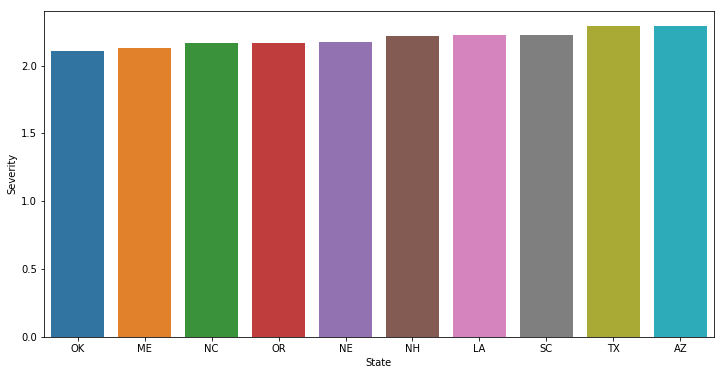

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(y='Severity', x='State',data=df_top_Severity_State.head(10))
plt.ioff()

**LOOKING AT THE WEATHER CONDITIONS **

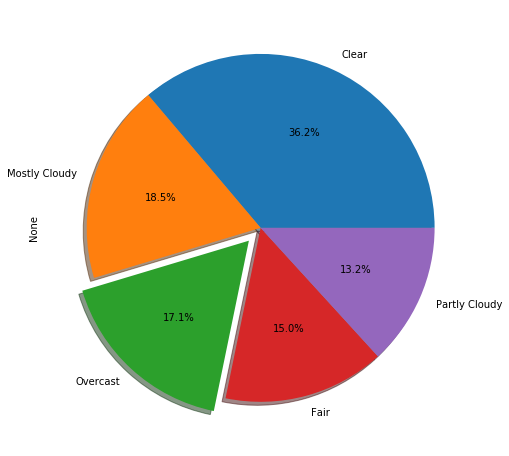

In [21]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

**Top Weather Conditions for accidents**

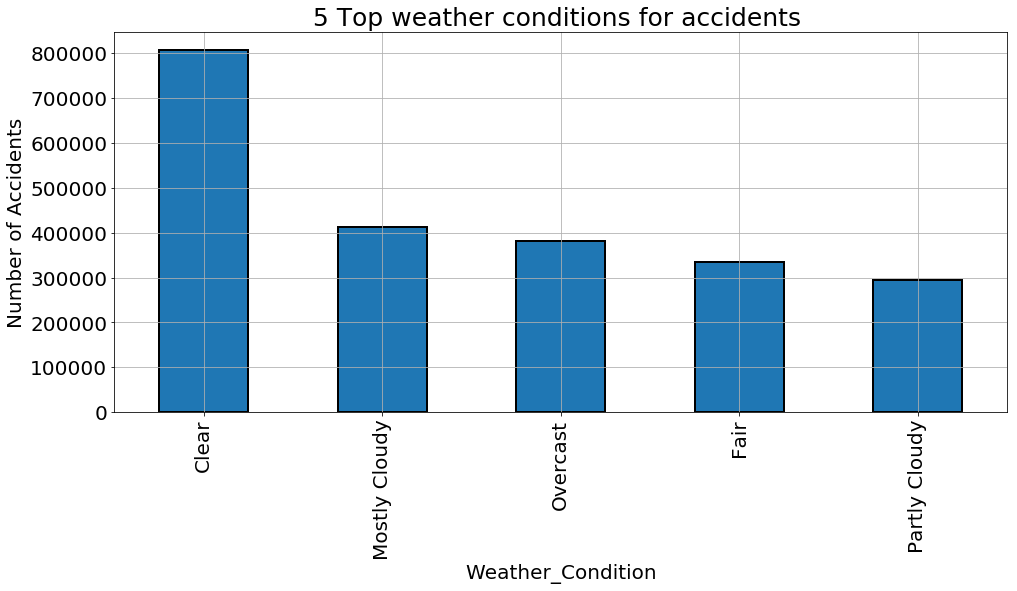

In [22]:
fig ,ax =plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top weather conditions for accidents ',fontsize=25)
plt.grid()
plt.ioff()

* It says that people drive more carefully when the weather is bad and most accidents occur in the clear weather due to carelessness*

**PLACES WHERE ACCIDENTS OCCUR MOST**

In [23]:
bool_cols=[col for col in df.columns if df[col].dtype == np.dtype('bool')]
booldf=df[bool_cols]
not_one_hot=booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows , which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))


There are 217913 non one hot metadata rows , which are 7.3% of the data


In [24]:
bools = booldf.sum(axis=0)
bools

Amenity             35220
Bump                  454
Crossing           207590
Give_Way             7627
Junction           238447
No_Exit              3395
Railway             25161
Roundabout            168
Station             56413
Stop                40160
Traffic_Calming      1111
Traffic_Signal     503383
Turning_Loop            0
dtype: int64

Text(0.5, 1.0, 'Proximity to the Traffic Object')

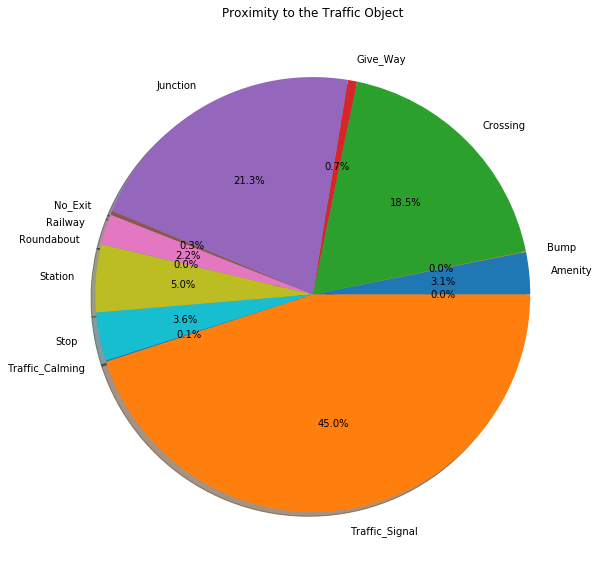

In [25]:
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel(" ")
plt.title('Proximity to the Traffic Object')

*As one can see that most accidents occur near traffic signal, junction and crossings*

In [26]:
df['time'] = pd.to_datetime(df.Start_Time , format = '%Y-%m-%d %H:%M:%S')
df= df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


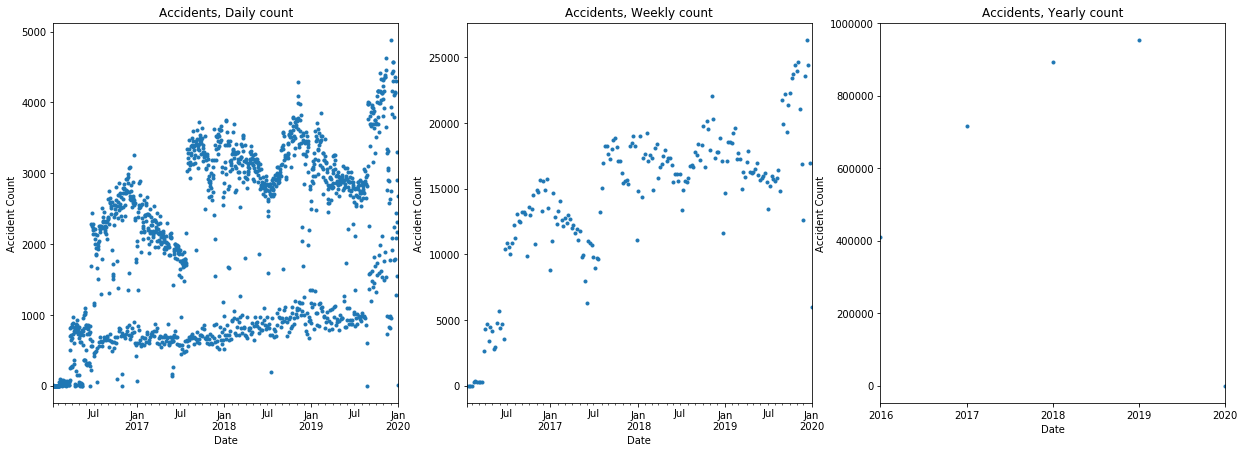

In [27]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

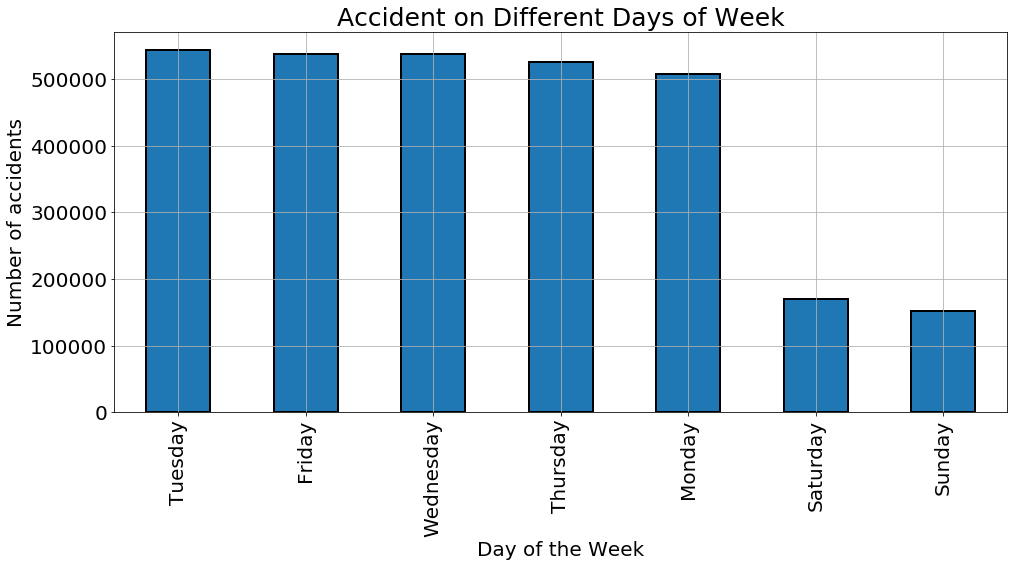

In [28]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour
fig, ax=plt.subplots(figsize=(16,7))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid()
plt.ioff()

**Keywords Used in the description**

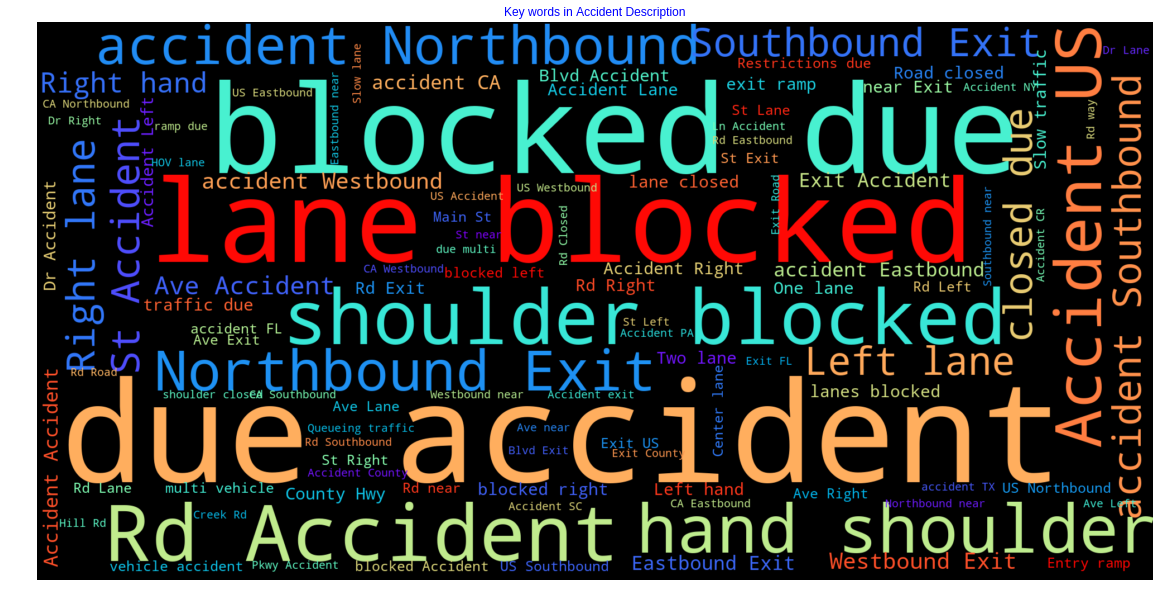

In [29]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df['Description'].str.split("(").str[0].value_counts().keys()
wc1=WordCloud(scale=5 , max_words=1000,colormap='rainbow',background_color='black').generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1 , interpolation='bilinear')
plt.axis('off')
plt.title('Key words in Accident Description', color='b')
plt.show()

**Factor plot**

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


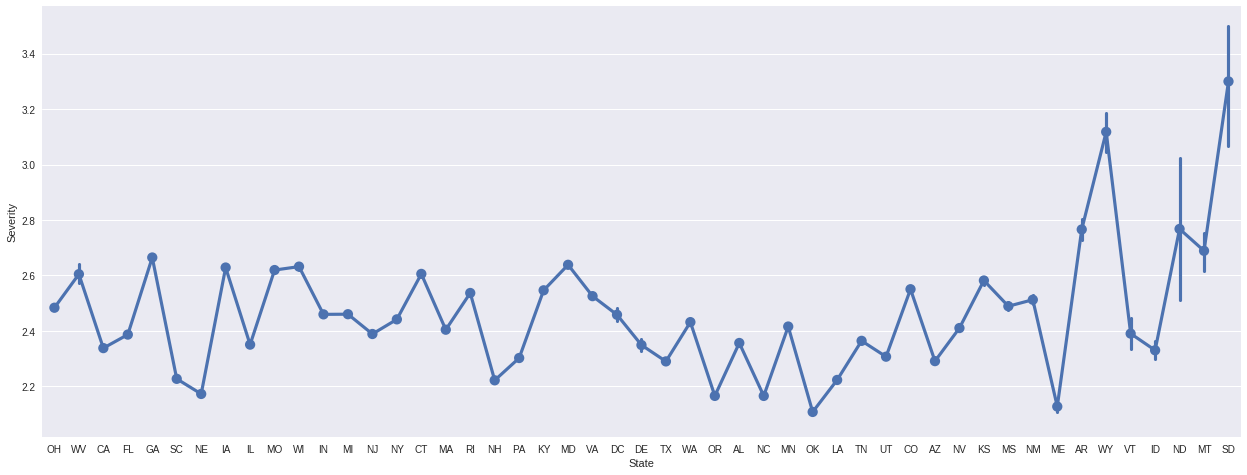

In [30]:
sns.factorplot('State', 'Severity',data=df)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

<Figure size 1008x576 with 0 Axes>

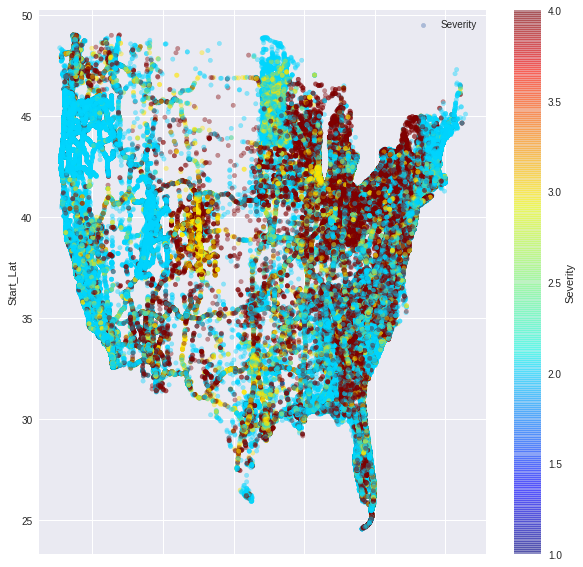

In [31]:
plt.figure(figsize=(14,8))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()